In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

%matplotlib inline

In [2]:
#Import data for what series I need, filter out relevant series only
url="http://download.bls.gov/pub/time.series/le/le.series"
s=requests.get(url).content

#filter and set to correct types
series_id=pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\t")
series_id['seasonal']=series_id['seasonal'].astype('str')
series_id['seasonal']=series_id['seasonal'].str.strip()
series_id['series_id']=series_id['series_id'].astype('category')
series_id['series_id']=series_id['series_id'].str.strip()

series_id2=series_id[(series_id.lfst_code==25)&
                    (series_id.fips_code==0)&
                    (series_id.tdata_code==0)&
                    (series_id.pcts_code==0)&
                    (series_id.earn_code==1)&
                    (series_id.class_code==16)&
                    (series_id.unin_code==0)&
                    (series_id.indy_code==0)&
                    (series_id.occupation_code==0)&
                    (series_id.education_code==0)&
                    (series_id.ages_code<>0)&(series_id.ages_code<>10)&(series_id.ages_code<>28)&
                    (series_id.race_code==0)&
                    (series_id.orig_code==0)&
                    (series_id.born_code==0)&
                    (series_id.sexs_code<>0)&
                    (series_id.seasonal=='U')]
series_id2=series_id2.loc[:,['series_id','sexs_code','ages_code','earn_code']]

In [3]:
#import data set and filter out relevant series
url="http://download.bls.gov/pub/time.series/le/le.data.1.AllData"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\t")
df['series_id']=df['series_id'].astype('category')
df['series_id']=df['series_id'].str.strip()
df=df[df['series_id'].isin(series_id2['series_id'])]
df=df[(df.year>1990)&(df.period=='Q05')]
df['value']=pd.to_numeric(df['value'],errors='coerce')

In [4]:
#merge with series, ages and sexs
df2=pd.merge(df,series_id2, on='series_id')

url="http://download.bls.gov/pub/time.series/le/le.ages"
s=requests.get(url).content
ages=pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\t",index_col=False)
df2=pd.merge(df2,ages, on='ages_code')

url="http://download.bls.gov/pub/time.series/le/le.sexs"
s=requests.get(url).content
sexs=pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\t",index_col=False)
df2=pd.merge(df2,sexs, on='sexs_code')

In [49]:
pivot=pd.pivot_table(df2[df2.year>1990], values='value', index=['year','ages_text'], columns=['sexs_text'])
pivot['percentage']=pivot.Women/pivot.Men
pivot.head(20)

sexs_text               Men  Women  percentage
year ages_text                                
1991 16 to 19 years     219    205    0.936073
     20 to 24 years     300    280    0.933333
     25 to 34 years     458    371    0.810044
     35 to 44 years     576    407    0.706597
     45 to 54 years     612    398    0.650327
     55 to 64 years     563    363    0.644760
     65 years and over  467    319    0.683084
1992 16 to 19 years     218    205    0.940367
     20 to 24 years     297    280    0.942761
     25 to 34 years     466    382    0.819742
     35 to 44 years     581    418    0.719449
     45 to 54 years     634    417    0.657729
     55 to 64 years     579    376    0.649396
     65 years and over  421    328    0.779097
1993 16 to 19 years     221    205    0.927602
     20 to 24 years     303    289    0.953795
     25 to 34 years     476    395    0.829832
     35 to 44 years     596    435    0.729866
     45 to 54 years     653    440    0.673813
     55 to 64 years     586    395    0.674061

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            197, 198, 199, 200, 201, 202, 203, 204, 205, 206],
           dtype='int64', length=207)

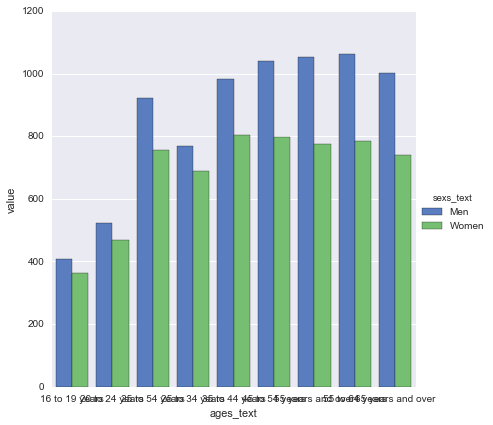

In [48]:
# Draw a nested barplot to show survival for class and sex
plot1 = sns.factorplot(x="ages_text", y="value", hue="sexs_text", data=df2[df2.year==2015],
                   size=6, kind="bar", palette="muted")

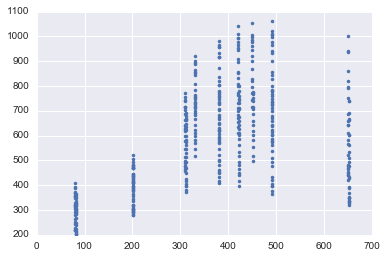

In [6]:
plt.figure()
plt.plot(df2.ages_code*10+df2.sexs_code,df2.value,".")
plt.show()